In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
import pydotplus

In [2]:
housing_data = pd.read_csv('C:/Users/kalam/OneDrive - Adobe/Personal/Data Sceince/dataset for students.csv')

OSError: [Errno 22] Invalid argument

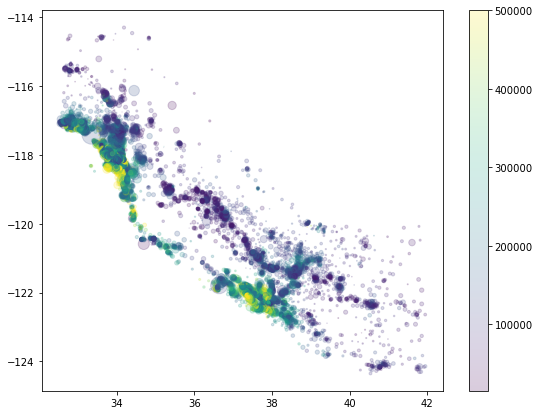

In [8]:
plt.figure(figsize = (9, 7))
plt.scatter(housing_data.latitude, housing_data.longitude, alpha = 0.2, c = housing_data.median_house_value, s = housing_data.population/100)
plt.colorbar()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

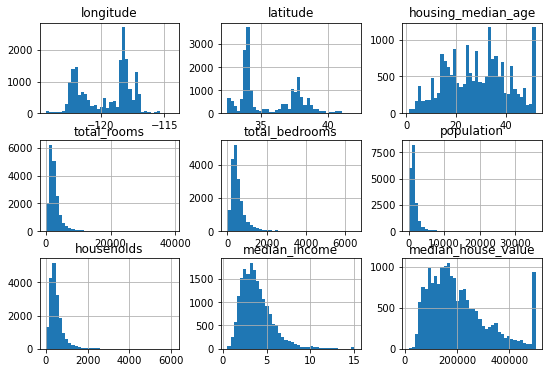

In [10]:
housing_data.hist(bins = 40, figsize = (9,6))

In [ ]:
housing_one_hot_encoded_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])
housing_data_prepared = housing_one_hot_encoded_data.drop(columns =['latitude','longitude'])


y = housing_data['median_house_value']
X = housing_data_prepared.drop(columns =['median_house_value'])
X['total_bedrooms'].fillna(X.total_bedrooms.median(), inplace = True)

X[1:5]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 15)
clf = DecisionTreeClassifier(criterion="gini")

clf.fit(x_train, y_train)
clf.score(x_train,y_train)

1.0

In [24]:
y_pred = clf.predict(x_test)

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  3],
       [ 0,  0,  0, ...,  0,  1, 86]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average = 'micro')
precision

0.025855103689738757

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()